V.1: Exploring the green reds

a)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import random
%matplotlib inline

/nfs/2017/s/ssong/.pyenv/versions/3.6.5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/nfs/2017/s/ssong/.pyenv/versions/3.6.5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
data = pd.read_csv("input/winequality-red.csv")
data.shape

(1599, 12)

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
data.shape

(1599, 12)

In [6]:
def plot_scatter_matrix(data, good_threshold, bad_threshold):
    
#     #take out the quality column
#     good_data = good_data.drop('quality', 1)
#     bad_data = bad_data.drop('quality', 1)

    names = data.columns
    good_data = data.loc[data['quality'] >= good_threshold]
    bad_data = data.loc[data['quality'] <= bad_threshold]

    
    numvars, numdata = data.shape
    fig, axes = plt.subplots(nrows=numdata, ncols=numdata, figsize=(20,20))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    
    for ax in axes.flat:
        # Hide all ticks and labels
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

    # Plot the data.
    for i in range(0, numdata):
        for j in range(0, numdata):
            if (i != j):
                for x, y in [(i,j), (j,i)]:
                    #iloc allows me to grab by index so when I'm plotting it just uses the column index and plots them.
                    axes[x,y].plot(bad_data.iloc[:, y], bad_data.iloc[:, x], linestyle='none', marker='.', color='red', mfc='none')
                    axes[x,y].plot(good_data.iloc[:, y], good_data.iloc[:, x], linestyle='none', marker='.', color='green', mfc='none')

    # Label the diagonal subplots...
    for i, label in enumerate(names):
        axes[i,i].annotate(label, (0.5, 0.5), xycoords='axes fraction',
                ha='center', va='center')

    return fig


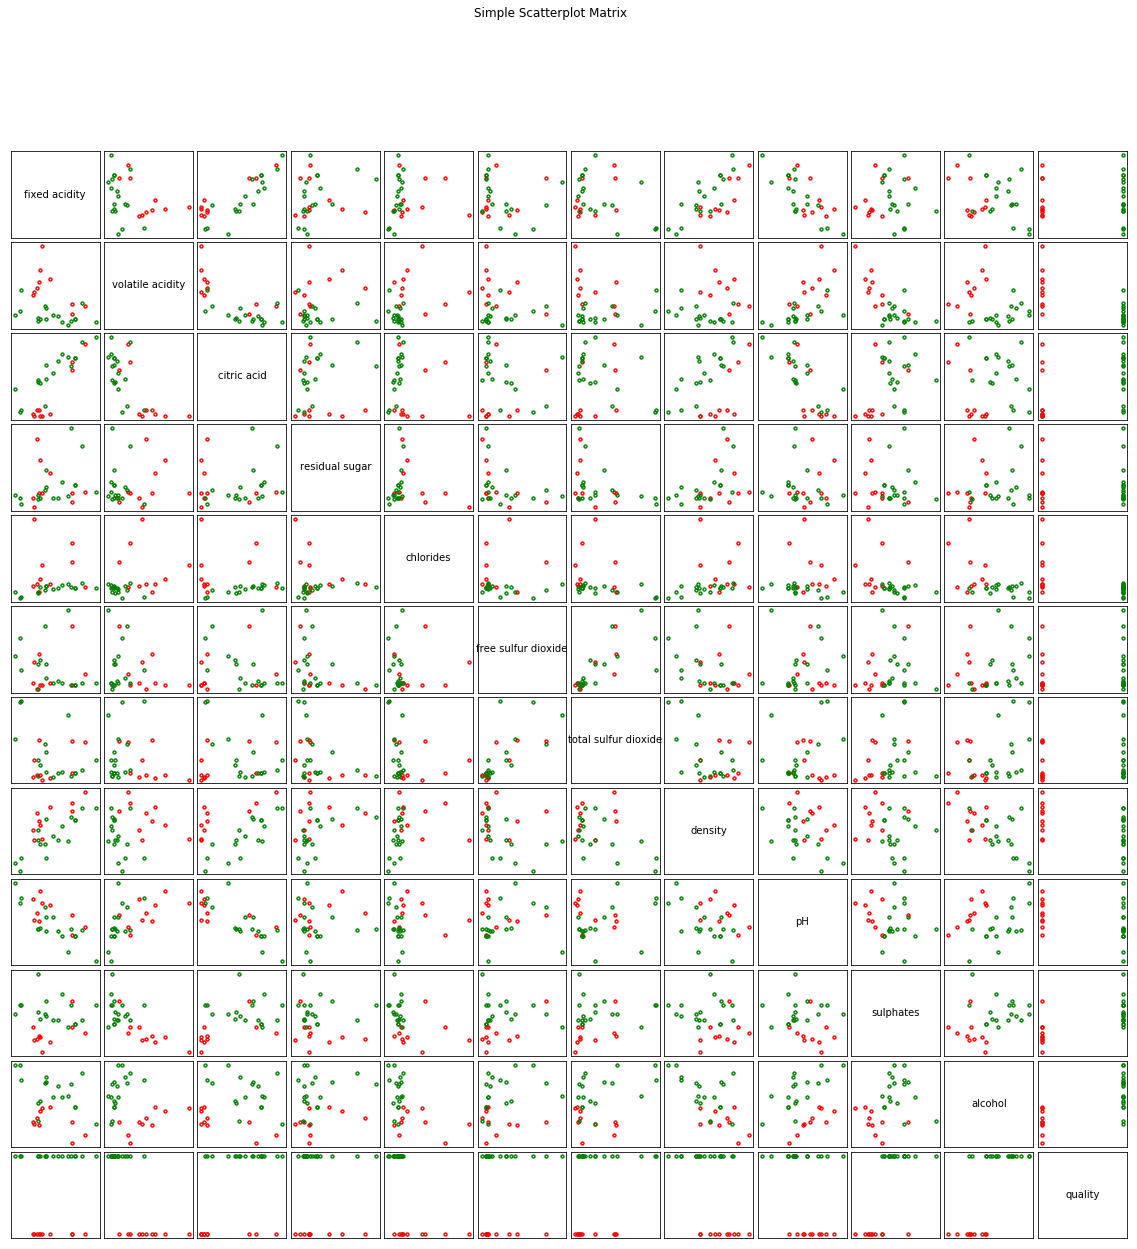

In [7]:
good_threshold = 8  
bad_threshold = 3

fig = plot_scatter_matrix(data,good_threshold,bad_threshold)
fig.suptitle('Simple Scatterplot Matrix')
plt.show()

b) Observations:
 1-Dimensional Analysis
 
    
    1) Lower volatile acidity trended to higher quality
    2) Low chlorides led trended to higher quality
    3) Higher alcohol content trended to higher quality
    4) Higher sulphates trended to higher quality
    5) Lower density trended to higher quality
    6) Lower pH trended to higher quality
    7) Most low quality wines had low citric acid
    8) Lower Sulfer dioxide trended to lower quality
 
 2-Dimensional Analysis
    * plots with greater separation between green and red show that these two factors have a relationship to quality 
    * poolings of green or red are also good indicators to relationship of quality
    
    1) Higher alcohol content with low volatile acidity led to higher ratings
    2) Lower Density and higher citric acid showed a trended to higher ratings
    3) High citric acid and low chlorides showed higher ratings
    
I think that volatile acidity, chlorids, sulphates, and alcohol content will be the most useful factors in deciding quality of wine because of the severity of their grouping and large disparity between high and low wines.
    

V.2 Learning to Perceptron

a) Implement a perceptron that:
    
       * Has randomly initialized weights and bias
       * Uses the Rosenblatt perceptron learning rule (with changeable learning rate)
       * Utilizes the heaviside step activation function (discrete version)

Predictions

Formula for activation function:
    * activation = (weight(0) * X(0)) + (weight(n) * x(n)) + bias

Heaviside step activation function:
    * if activation is > 1 then it predicts 1 if else returns 0.
    * simple binary classification

In [8]:
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        #iterate through inputs and multiply them to corresponding weights
        activation += weights[i + 1] * row[i]
        
    #use a transfer function to change value to 1 or 0.
    return 1.0 if activation >= 0.0 else 0.0

Training

There are 3 loops we need to perform in the function:

    1) Loop over each epoch.
    2) Loop over each row in the training data per epoch.
    3) Loop over each weight per feature in row.

In [9]:
# Estimate Perceptron weights using stochastic gradient descent

#The perceptron learning rule basically just adds the actual value 
def train_weights(train, l_rate, n_epoch):
    performance = []

    #random weights
    weights = [random.uniform(0, 1) for i in range(len(train[0]))]
    
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)
            error = row[-1] - prediction
            sum_error += abs(error)
            weights[0] = weights[0] + l_rate * error
            for i in range(len(row) - 1):
                if (error > 0):
                    weights[i + 1] = weights[i + 1] + (l_rate * row[i])
                elif (error < 0):
                    weights[i + 1] = weights[i + 1] - (l_rate * row[i])
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
        performance.append((epoch, sum_error, weights[1:], weights[0]))
    if n_epoch <= 0:
        epoch = 0
        sum_error = 1.0
        while sum_error != 0:
            sum_error = 0.0
            for row in train:
                prediction = predict(row, weights)
                error = row[-1] - prediction
                sum_error += abs(error)
                weights[0] = weights[0] + l_rate * error
                for i in range(len(row) - 1):
                    if (error > 0):
                        weights[i + 1] = weights[i + 1] + (l_rate * row[i])
                    elif (error < 0):
                        weights[i + 1] = weights[i + 1] - (l_rate * row[i])
            print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))            
            performance.append((epoch, sum_error, weights[1:], weights[0]))
            epoch += 1 
    print(weights)
    return performance

In [10]:
def dataframe_to_list(data, good_threshold, bad_threshold, columns):
    new_data = data.copy()

    #Covert all labels to 1 or 0 with threshold of good and bad
    new_data['good_bad'] = [1 if x >= good_threshold else 0 for x in new_data['quality']]

    #Grab all data higher than 8 or lower than 3 in quality.
    new_data = new_data.loc[(data['quality'] >= good_threshold) | (data['quality'] <= bad_threshold)]

    #Grab only the 3 columns
    test_train = new_data.loc[:, columns]
    test_train = test_train.values.tolist()
    return (test_train)


In [11]:
test_train = dataframe_to_list(data, good_threshold=8, bad_threshold=3, columns=['pH', 'alcohol', 'good_bad'])
# test_train

In [12]:
performance = train_weights(test_train, l_rate=5, n_epoch=0)

>epoch=0, lrate=5.000, error=13.000
>epoch=1, lrate=5.000, error=13.000
>epoch=2, lrate=5.000, error=11.000
>epoch=3, lrate=5.000, error=11.000
>epoch=4, lrate=5.000, error=11.000
>epoch=5, lrate=5.000, error=13.000
>epoch=6, lrate=5.000, error=11.000
>epoch=7, lrate=5.000, error=13.000
>epoch=8, lrate=5.000, error=7.000
>epoch=9, lrate=5.000, error=4.000
>epoch=10, lrate=5.000, error=6.000
>epoch=11, lrate=5.000, error=9.000
>epoch=12, lrate=5.000, error=2.000
>epoch=13, lrate=5.000, error=2.000
>epoch=14, lrate=5.000, error=4.000
>epoch=15, lrate=5.000, error=6.000
>epoch=16, lrate=5.000, error=7.000
>epoch=17, lrate=5.000, error=4.000
>epoch=18, lrate=5.000, error=2.000
>epoch=19, lrate=5.000, error=4.000
>epoch=20, lrate=5.000, error=6.000
>epoch=21, lrate=5.000, error=7.000
>epoch=22, lrate=5.000, error=4.000
>epoch=23, lrate=5.000, error=2.000
>epoch=24, lrate=5.000, error=4.000
>epoch=25, lrate=5.000, error=6.000
>epoch=26, lrate=5.000, error=8.000
>epoch=27, lrate=5.000, error=

>epoch=1348, lrate=5.000, error=2.000
>epoch=1349, lrate=5.000, error=2.000
>epoch=1350, lrate=5.000, error=2.000
>epoch=1351, lrate=5.000, error=2.000
>epoch=1352, lrate=5.000, error=2.000
>epoch=1353, lrate=5.000, error=2.000
>epoch=1354, lrate=5.000, error=2.000
>epoch=1355, lrate=5.000, error=2.000
>epoch=1356, lrate=5.000, error=1.000
>epoch=1357, lrate=5.000, error=2.000
>epoch=1358, lrate=5.000, error=2.000
>epoch=1359, lrate=5.000, error=2.000
>epoch=1360, lrate=5.000, error=2.000
>epoch=1361, lrate=5.000, error=2.000
>epoch=1362, lrate=5.000, error=2.000
>epoch=1363, lrate=5.000, error=2.000
>epoch=1364, lrate=5.000, error=2.000
>epoch=1365, lrate=5.000, error=2.000
>epoch=1366, lrate=5.000, error=2.000
>epoch=1367, lrate=5.000, error=2.000
>epoch=1368, lrate=5.000, error=2.000
>epoch=1369, lrate=5.000, error=2.000
>epoch=1370, lrate=5.000, error=2.000
>epoch=1371, lrate=5.000, error=2.000
>epoch=1372, lrate=5.000, error=2.000
>epoch=1373, lrate=5.000, error=2.000
>epoch=1374,

>epoch=1911, lrate=5.000, error=2.000
>epoch=1912, lrate=5.000, error=2.000
>epoch=1913, lrate=5.000, error=2.000
>epoch=1914, lrate=5.000, error=2.000
>epoch=1915, lrate=5.000, error=2.000
>epoch=1916, lrate=5.000, error=2.000
>epoch=1917, lrate=5.000, error=2.000
>epoch=1918, lrate=5.000, error=2.000
>epoch=1919, lrate=5.000, error=2.000
>epoch=1920, lrate=5.000, error=2.000
>epoch=1921, lrate=5.000, error=2.000
>epoch=1922, lrate=5.000, error=2.000
>epoch=1923, lrate=5.000, error=2.000
>epoch=1924, lrate=5.000, error=2.000
>epoch=1925, lrate=5.000, error=2.000
>epoch=1926, lrate=5.000, error=2.000
>epoch=1927, lrate=5.000, error=2.000
>epoch=1928, lrate=5.000, error=2.000
>epoch=1929, lrate=5.000, error=2.000
>epoch=1930, lrate=5.000, error=2.000
>epoch=1931, lrate=5.000, error=1.000
>epoch=1932, lrate=5.000, error=2.000
>epoch=1933, lrate=5.000, error=2.000
>epoch=1934, lrate=5.000, error=2.000
>epoch=1935, lrate=5.000, error=2.000
>epoch=1936, lrate=5.000, error=2.000
>epoch=1937,

>epoch=2910, lrate=5.000, error=2.000
>epoch=2911, lrate=5.000, error=2.000
>epoch=2912, lrate=5.000, error=2.000
>epoch=2913, lrate=5.000, error=2.000
>epoch=2914, lrate=5.000, error=2.000
>epoch=2915, lrate=5.000, error=2.000
>epoch=2916, lrate=5.000, error=1.000
>epoch=2917, lrate=5.000, error=2.000
>epoch=2918, lrate=5.000, error=2.000
>epoch=2919, lrate=5.000, error=2.000
>epoch=2920, lrate=5.000, error=2.000
>epoch=2921, lrate=5.000, error=2.000
>epoch=2922, lrate=5.000, error=2.000
>epoch=2923, lrate=5.000, error=2.000
>epoch=2924, lrate=5.000, error=2.000
>epoch=2925, lrate=5.000, error=2.000
>epoch=2926, lrate=5.000, error=2.000
>epoch=2927, lrate=5.000, error=2.000
>epoch=2928, lrate=5.000, error=2.000
>epoch=2929, lrate=5.000, error=2.000
>epoch=2930, lrate=5.000, error=2.000
>epoch=2931, lrate=5.000, error=2.000
>epoch=2932, lrate=5.000, error=2.000
>epoch=2933, lrate=5.000, error=2.000
>epoch=2934, lrate=5.000, error=2.000
>epoch=2935, lrate=5.000, error=2.000
>epoch=2936,

>epoch=3910, lrate=5.000, error=2.000
>epoch=3911, lrate=5.000, error=2.000
>epoch=3912, lrate=5.000, error=2.000
>epoch=3913, lrate=5.000, error=2.000
>epoch=3914, lrate=5.000, error=2.000
>epoch=3915, lrate=5.000, error=2.000
>epoch=3916, lrate=5.000, error=2.000
>epoch=3917, lrate=5.000, error=2.000
>epoch=3918, lrate=5.000, error=1.000
>epoch=3919, lrate=5.000, error=2.000
>epoch=3920, lrate=5.000, error=2.000
>epoch=3921, lrate=5.000, error=2.000
>epoch=3922, lrate=5.000, error=2.000
>epoch=3923, lrate=5.000, error=2.000
>epoch=3924, lrate=5.000, error=2.000
>epoch=3925, lrate=5.000, error=2.000
>epoch=3926, lrate=5.000, error=2.000
>epoch=3927, lrate=5.000, error=2.000
>epoch=3928, lrate=5.000, error=2.000
>epoch=3929, lrate=5.000, error=2.000
>epoch=3930, lrate=5.000, error=2.000
>epoch=3931, lrate=5.000, error=2.000
>epoch=3932, lrate=5.000, error=2.000
>epoch=3933, lrate=5.000, error=2.000
>epoch=3934, lrate=5.000, error=2.000
>epoch=3935, lrate=5.000, error=2.000
>epoch=3936,

>epoch=4909, lrate=5.000, error=2.000
>epoch=4910, lrate=5.000, error=2.000
>epoch=4911, lrate=5.000, error=2.000
>epoch=4912, lrate=5.000, error=1.000
>epoch=4913, lrate=5.000, error=2.000
>epoch=4914, lrate=5.000, error=2.000
>epoch=4915, lrate=5.000, error=2.000
>epoch=4916, lrate=5.000, error=2.000
>epoch=4917, lrate=5.000, error=2.000
>epoch=4918, lrate=5.000, error=2.000
>epoch=4919, lrate=5.000, error=2.000
>epoch=4920, lrate=5.000, error=2.000
>epoch=4921, lrate=5.000, error=2.000
>epoch=4922, lrate=5.000, error=2.000
>epoch=4923, lrate=5.000, error=2.000
>epoch=4924, lrate=5.000, error=2.000
>epoch=4925, lrate=5.000, error=2.000
>epoch=4926, lrate=5.000, error=2.000
>epoch=4927, lrate=5.000, error=2.000
>epoch=4928, lrate=5.000, error=2.000
>epoch=4929, lrate=5.000, error=2.000
>epoch=4930, lrate=5.000, error=2.000
>epoch=4931, lrate=5.000, error=1.000
>epoch=4932, lrate=5.000, error=2.000
>epoch=4933, lrate=5.000, error=2.000
>epoch=4934, lrate=5.000, error=2.000
>epoch=4935,

>epoch=5909, lrate=5.000, error=2.000
>epoch=5910, lrate=5.000, error=2.000
>epoch=5911, lrate=5.000, error=2.000
>epoch=5912, lrate=5.000, error=2.000
>epoch=5913, lrate=5.000, error=2.000
>epoch=5914, lrate=5.000, error=2.000
>epoch=5915, lrate=5.000, error=2.000
>epoch=5916, lrate=5.000, error=2.000
>epoch=5917, lrate=5.000, error=2.000
>epoch=5918, lrate=5.000, error=2.000
>epoch=5919, lrate=5.000, error=2.000
>epoch=5920, lrate=5.000, error=2.000
>epoch=5921, lrate=5.000, error=2.000
>epoch=5922, lrate=5.000, error=2.000
>epoch=5923, lrate=5.000, error=2.000
>epoch=5924, lrate=5.000, error=2.000
>epoch=5925, lrate=5.000, error=2.000
>epoch=5926, lrate=5.000, error=1.000
>epoch=5927, lrate=5.000, error=2.000
>epoch=5928, lrate=5.000, error=2.000
>epoch=5929, lrate=5.000, error=2.000
>epoch=5930, lrate=5.000, error=2.000
>epoch=5931, lrate=5.000, error=2.000
>epoch=5932, lrate=5.000, error=2.000
>epoch=5933, lrate=5.000, error=2.000
>epoch=5934, lrate=5.000, error=2.000
>epoch=5935,

>epoch=6908, lrate=5.000, error=2.000
>epoch=6909, lrate=5.000, error=2.000
>epoch=6910, lrate=5.000, error=2.000
>epoch=6911, lrate=5.000, error=2.000
>epoch=6912, lrate=5.000, error=2.000
>epoch=6913, lrate=5.000, error=2.000
>epoch=6914, lrate=5.000, error=2.000
>epoch=6915, lrate=5.000, error=2.000
>epoch=6916, lrate=5.000, error=2.000
>epoch=6917, lrate=5.000, error=2.000
>epoch=6918, lrate=5.000, error=2.000
>epoch=6919, lrate=5.000, error=2.000
>epoch=6920, lrate=5.000, error=2.000
>epoch=6921, lrate=5.000, error=1.000
>epoch=6922, lrate=5.000, error=2.000
>epoch=6923, lrate=5.000, error=2.000
>epoch=6924, lrate=5.000, error=2.000
>epoch=6925, lrate=5.000, error=2.000
>epoch=6926, lrate=5.000, error=2.000
>epoch=6927, lrate=5.000, error=2.000
>epoch=6928, lrate=5.000, error=2.000
>epoch=6929, lrate=5.000, error=2.000
>epoch=6930, lrate=5.000, error=2.000
>epoch=6931, lrate=5.000, error=2.000
>epoch=6932, lrate=5.000, error=2.000
>epoch=6933, lrate=5.000, error=2.000
>epoch=6934,

>epoch=8393, lrate=5.000, error=2.000
>epoch=8394, lrate=5.000, error=2.000
>epoch=8395, lrate=5.000, error=2.000
>epoch=8396, lrate=5.000, error=2.000
>epoch=8397, lrate=5.000, error=2.000
>epoch=8398, lrate=5.000, error=2.000
>epoch=8399, lrate=5.000, error=2.000
>epoch=8400, lrate=5.000, error=2.000
>epoch=8401, lrate=5.000, error=2.000
>epoch=8402, lrate=5.000, error=2.000
>epoch=8403, lrate=5.000, error=2.000
>epoch=8404, lrate=5.000, error=1.000
>epoch=8405, lrate=5.000, error=2.000
>epoch=8406, lrate=5.000, error=2.000
>epoch=8407, lrate=5.000, error=2.000
>epoch=8408, lrate=5.000, error=2.000
>epoch=8409, lrate=5.000, error=2.000
>epoch=8410, lrate=5.000, error=2.000
>epoch=8411, lrate=5.000, error=2.000
>epoch=8412, lrate=5.000, error=2.000
>epoch=8413, lrate=5.000, error=2.000
>epoch=8414, lrate=5.000, error=2.000
>epoch=8415, lrate=5.000, error=2.000
>epoch=8416, lrate=5.000, error=2.000
>epoch=8417, lrate=5.000, error=2.000
>epoch=8418, lrate=5.000, error=2.000
>epoch=8419,

>epoch=8907, lrate=5.000, error=2.000
>epoch=8908, lrate=5.000, error=2.000
>epoch=8909, lrate=5.000, error=2.000
>epoch=8910, lrate=5.000, error=2.000
>epoch=8911, lrate=5.000, error=1.000
>epoch=8912, lrate=5.000, error=2.000
>epoch=8913, lrate=5.000, error=2.000
>epoch=8914, lrate=5.000, error=2.000
>epoch=8915, lrate=5.000, error=2.000
>epoch=8916, lrate=5.000, error=2.000
>epoch=8917, lrate=5.000, error=2.000
>epoch=8918, lrate=5.000, error=2.000
>epoch=8919, lrate=5.000, error=2.000
>epoch=8920, lrate=5.000, error=2.000
>epoch=8921, lrate=5.000, error=2.000
>epoch=8922, lrate=5.000, error=2.000
>epoch=8923, lrate=5.000, error=2.000
>epoch=8924, lrate=5.000, error=2.000
>epoch=8925, lrate=5.000, error=2.000
>epoch=8926, lrate=5.000, error=2.000
>epoch=8927, lrate=5.000, error=2.000
>epoch=8928, lrate=5.000, error=2.000
>epoch=8929, lrate=5.000, error=2.000
>epoch=8930, lrate=5.000, error=1.000
>epoch=8931, lrate=5.000, error=2.000
>epoch=8932, lrate=5.000, error=2.000
>epoch=8933,

>epoch=10280, lrate=5.000, error=2.000
>epoch=10281, lrate=5.000, error=1.000
>epoch=10282, lrate=5.000, error=2.000
>epoch=10283, lrate=5.000, error=2.000
>epoch=10284, lrate=5.000, error=2.000
>epoch=10285, lrate=5.000, error=2.000
>epoch=10286, lrate=5.000, error=2.000
>epoch=10287, lrate=5.000, error=2.000
>epoch=10288, lrate=5.000, error=2.000
>epoch=10289, lrate=5.000, error=2.000
>epoch=10290, lrate=5.000, error=2.000
>epoch=10291, lrate=5.000, error=2.000
>epoch=10292, lrate=5.000, error=2.000
>epoch=10293, lrate=5.000, error=2.000
>epoch=10294, lrate=5.000, error=2.000
>epoch=10295, lrate=5.000, error=2.000
>epoch=10296, lrate=5.000, error=2.000
>epoch=10297, lrate=5.000, error=2.000
>epoch=10298, lrate=5.000, error=2.000
>epoch=10299, lrate=5.000, error=2.000
>epoch=10300, lrate=5.000, error=1.000
>epoch=10301, lrate=5.000, error=2.000
>epoch=10302, lrate=5.000, error=2.000
>epoch=10303, lrate=5.000, error=2.000
>epoch=10304, lrate=5.000, error=2.000
>epoch=10305, lrate=5.000

>epoch=11406, lrate=5.000, error=2.000
>epoch=11407, lrate=5.000, error=1.000
>epoch=11408, lrate=5.000, error=2.000
>epoch=11409, lrate=5.000, error=2.000
>epoch=11410, lrate=5.000, error=2.000
>epoch=11411, lrate=5.000, error=2.000
>epoch=11412, lrate=5.000, error=2.000
>epoch=11413, lrate=5.000, error=2.000
>epoch=11414, lrate=5.000, error=2.000
>epoch=11415, lrate=5.000, error=2.000
>epoch=11416, lrate=5.000, error=2.000
>epoch=11417, lrate=5.000, error=2.000
>epoch=11418, lrate=5.000, error=2.000
>epoch=11419, lrate=5.000, error=2.000
>epoch=11420, lrate=5.000, error=2.000
>epoch=11421, lrate=5.000, error=2.000
>epoch=11422, lrate=5.000, error=2.000
>epoch=11423, lrate=5.000, error=2.000
>epoch=11424, lrate=5.000, error=2.000
>epoch=11425, lrate=5.000, error=2.000
>epoch=11426, lrate=5.000, error=1.000
>epoch=11427, lrate=5.000, error=2.000
>epoch=11428, lrate=5.000, error=2.000
>epoch=11429, lrate=5.000, error=2.000
>epoch=11430, lrate=5.000, error=2.000
>epoch=11431, lrate=5.000

>epoch=12906, lrate=5.000, error=2.000
>epoch=12907, lrate=5.000, error=2.000
>epoch=12908, lrate=5.000, error=2.000
>epoch=12909, lrate=5.000, error=1.000
>epoch=12910, lrate=5.000, error=2.000
>epoch=12911, lrate=5.000, error=2.000
>epoch=12912, lrate=5.000, error=2.000
>epoch=12913, lrate=5.000, error=2.000
>epoch=12914, lrate=5.000, error=2.000
>epoch=12915, lrate=5.000, error=2.000
>epoch=12916, lrate=5.000, error=2.000
>epoch=12917, lrate=5.000, error=2.000
>epoch=12918, lrate=5.000, error=2.000
>epoch=12919, lrate=5.000, error=2.000
>epoch=12920, lrate=5.000, error=2.000
>epoch=12921, lrate=5.000, error=2.000
>epoch=12922, lrate=5.000, error=2.000
>epoch=12923, lrate=5.000, error=2.000
>epoch=12924, lrate=5.000, error=2.000
>epoch=12925, lrate=5.000, error=2.000
>epoch=12926, lrate=5.000, error=2.000
>epoch=12927, lrate=5.000, error=2.000
>epoch=12928, lrate=5.000, error=1.000
>epoch=12929, lrate=5.000, error=2.000
>epoch=12930, lrate=5.000, error=2.000
>epoch=12931, lrate=5.000

Predictions on Test Data

In [13]:
# bias = performance[-1][3]
# weights = list(performance[-1][2])
# print(bias, weights)

# weights.insert(0, bias)
# print(weights)

In [14]:
# for row in test_train:
#     prediction = predict(row, weights)
#     print("Expected=%d, Predicted=%d" % (row[-1], prediction))

In [15]:
#Format (epoch, error, weights, bias)
print(performance[0])

(0, 13.0, [-17.428558847649256, 19.940668105221476], -4.252025427735603)


In [16]:
def frange(x, y, jump):
    while x < y:
        yield x
        x += jump

def eval_y_per_x(formula, x_values):
    y_values = []
    for x in x_values:
        y_values.append(eval(formula))
    return y_values

def graph(formula, wine_data, ax2):     
    x = wine_data.alcohol.tolist()
    x = [i for i in frange(min(x), max(x), .1)]
    y = eval_y_per_x(formula, x)
    d_min = [min(y) for l in range(0, len(x))]
    d_max = max(y)
    ax2.plot(x, y, linestyle='dashed', label='decision boundary')
    ax2.fill_between(x, y, d_min, facecolor='lightgreen', alpha=0.5)
    ax2.fill_between(x, y, d_max, facecolor='pink', alpha=0.5)

In [17]:
#if epoch is equal to -1 then it shows the line for last epoch
#please put a valid epoch under the number of epoch's attempted

def plot_performance(performance, wine_data, good_thresh, bad_thresh, epoch, save_plot=False):
    #Separate Data to good and bad wine depending on threshold
    good_data = wine_data.loc[data['quality'] >= good_thresh]
    bad_data = wine_data.loc[data['quality'] <= bad_thresh]
   
    listofepochs = [x[0] for x in performance]
    error = [x[1] for x in performance]
    
    #find length of epoch's so I can use last one if -1
    if (epoch >= len(listofepochs)):
        print("Please Put Valid Epoch. If you wish for last epoch put -1")
        return
    
    if (epoch < 0):
        epoch = len(listofepochs) - 1
        
    fig, (ax1, ax2) = plt.subplots(figsize=(12, 4), ncols=2)
    ax1.plot(listofepochs, error)
    ax1.set_title('Error / Epoch Graph')
    ax1.set_ylabel('Sum_Error')
    ax1.set_xlabel('Epoch #')

    ax2.scatter(good_data.alcohol.tolist(), good_data.pH.tolist(), color = 'green', label='good')
    ax2.scatter(bad_data.alcohol.tolist(), bad_data.pH.tolist(), color = 'red', label='bad')
    formula = '({}*x + {})/-{}'.format(performance[epoch][2][1], performance[epoch][3], performance[epoch][2][0])

    graph(formula, wine_data, ax2)
    ax2.set_title('Decision boundary on epoch: {}'.format(epoch))
    ax2.set_ylabel('pH')
    ax2.set_xlabel('alcohol')
    ax2.legend()
    if (save_plot == True):
        plt.savefig('performance_graph.png')
    

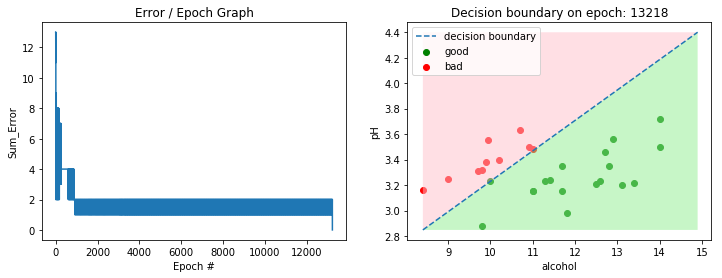

In [18]:
plot_performance(performance, data, 8, 3, -30, save_plot=False)

d) The reason it takes so many epochs to train is because the data is not normalized (or represented between 0 and 1). It takes alot longer for the bias and weights to calibrate for numbers that are larger than one. 


In [19]:
# #Feature Scaling
# #Function for normalizing is ((X - min) / (max - min))

# def normalize_data(data):
    

In [20]:
norm_data = data.copy()
features = [x for x in norm_data.columns]
for feature in features:
    maxim = norm_data[feature].max()
    minim = norm_data[feature].min()
    print(feature, maxim, minim)
    if feature != 'quality':
        norm_data[feature] = norm_data[feature].apply(lambda x: (x - minim) / (maxim - minim))
    
#Double Check if it was normalized
norm_data.describe()

fixed acidity 15.9 4.6
volatile acidity 1.58 0.12
citric acid 1.0 0.0
residual sugar 15.5 0.9
chlorides 0.611 0.012
free sulfur dioxide 72.0 1.0
total sulfur dioxide 289.0 6.0
density 1.00369 0.9900700000000001
pH 4.01 2.74
sulphates 2.0 0.33
alcohol 14.9 8.4
quality 8 3


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228,5.636023
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949,0.807569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231,5.000000
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923,6.000000
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [21]:
def dataframe_to_list(data, good_threshold, bad_threshold, columns):
    new_data = data.copy()

    #Covert all labels to 1 or 0 with threshold of good and bad
    new_data['good_bad'] = [1 if x >= good_threshold else 0 for x in new_data['quality']]

    #Grab all data higher than 8 or lower than 3 in quality.
    new_data = new_data.loc[(data['quality'] >= good_threshold) | (data['quality'] <= bad_threshold)]

    #Grab only the 3 columns
    test_train = new_data.loc[:, columns]
    test_train = test_train.values.tolist()
    return (test_train)


In [22]:
norm_train = dataframe_to_list(norm_data, 8, 3, ['pH', 'alcohol', 'good_bad'])

In [23]:
norm_train

[[0.48031496062992135, 0.676923076923077, 1.0],
 [0.38582677165354323, 0.6461538461538461, 1.0],
 [0.6456692913385828, 0.6923076923076923, 1.0],
 [0.11023622047244074, 0.21538461538461545, 1.0],
 [0.3779527559055119, 0.7692307692307693, 1.0],
 [0.40157480314960625, 0.09230769230769226, 0.0],
 [0.3228346456692912, 0.5076923076923076, 1.0],
 [0.3228346456692912, 0.39999999999999997, 1.0],
 [0.3228346456692912, 0.39999999999999997, 1.0],
 [0.3307086614173229, 0.0, 0.0],
 [0.7716535433070869, 0.8615384615384615, 1.0],
 [0.7007874015748031, 0.3538461538461537, 0.0],
 [0.5669291338582677, 0.6615384615384614, 1.0],
 [0.5039370078740156, 0.23076923076923078, 0.0],
 [0.5826771653543307, 0.39999999999999997, 0.0],
 [0.37007874015748027, 0.6307692307692307, 1.0],
 [0.1889763779527558, 0.5230769230769231, 1.0],
 [0.3622047244094489, 0.723076923076923, 1.0],
 [0.48031496062992135, 0.5076923076923076, 1.0],
 [0.5984251968503937, 0.8615384615384615, 1.0],
 [0.5984251968503937, 0.38461538461538464, 0.

In [24]:
l_rate = 5
n_epoch = 0
performance = train_weights(norm_train, l_rate, n_epoch)

>epoch=0, lrate=5.000, error=12.000
>epoch=1, lrate=5.000, error=8.000
>epoch=2, lrate=5.000, error=8.000
>epoch=3, lrate=5.000, error=6.000
>epoch=4, lrate=5.000, error=6.000
>epoch=5, lrate=5.000, error=4.000
>epoch=6, lrate=5.000, error=4.000
>epoch=7, lrate=5.000, error=2.000
>epoch=8, lrate=5.000, error=2.000
>epoch=9, lrate=5.000, error=2.000
>epoch=10, lrate=5.000, error=2.000
>epoch=11, lrate=5.000, error=2.000
>epoch=12, lrate=5.000, error=2.000
>epoch=13, lrate=5.000, error=2.000
>epoch=14, lrate=5.000, error=2.000
>epoch=15, lrate=5.000, error=2.000
>epoch=16, lrate=5.000, error=2.000
>epoch=17, lrate=5.000, error=2.000
>epoch=18, lrate=5.000, error=2.000
>epoch=19, lrate=5.000, error=2.000
>epoch=20, lrate=5.000, error=2.000
>epoch=21, lrate=5.000, error=2.000
>epoch=22, lrate=5.000, error=2.000
>epoch=23, lrate=5.000, error=2.000
>epoch=24, lrate=5.000, error=2.000
>epoch=25, lrate=5.000, error=2.000
>epoch=26, lrate=5.000, error=2.000
>epoch=27, lrate=5.000, error=2.000
>

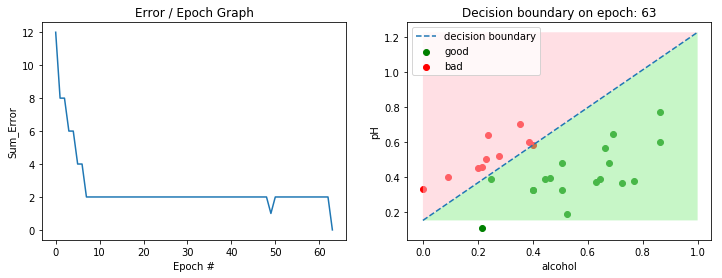

In [25]:
plot_performance(performance, norm_data, 8, 3, -1, save_plot=False)

V.3 My fair ADALINE

a) Results after lowering good threshold to 7 and raising bad threshold to 4
       
       * Look at the graph below and see how interlaced both datasets are. There is no way to make a linear classifier that can differentiate between the two without huge errors
       * Technical term is linearly inseparable problems

In [26]:
norm_train_new_threshold = dataframe_to_list(norm_data, good_threshold=7, bad_threshold=4, columns=['pH', 'alcohol', 'good_bad'])
print(len(norm_train_new_threshold))

280


In [27]:
performance = train_weights(norm_train_new_threshold, l_rate=.5, n_epoch=150)

>epoch=0, lrate=0.500, error=59.000
>epoch=1, lrate=0.500, error=54.000
>epoch=2, lrate=0.500, error=50.000
>epoch=3, lrate=0.500, error=44.000
>epoch=4, lrate=0.500, error=42.000
>epoch=5, lrate=0.500, error=44.000
>epoch=6, lrate=0.500, error=36.000
>epoch=7, lrate=0.500, error=42.000
>epoch=8, lrate=0.500, error=36.000
>epoch=9, lrate=0.500, error=44.000
>epoch=10, lrate=0.500, error=36.000
>epoch=11, lrate=0.500, error=46.000
>epoch=12, lrate=0.500, error=42.000
>epoch=13, lrate=0.500, error=44.000
>epoch=14, lrate=0.500, error=36.000
>epoch=15, lrate=0.500, error=46.000
>epoch=16, lrate=0.500, error=42.000
>epoch=17, lrate=0.500, error=44.000
>epoch=18, lrate=0.500, error=36.000
>epoch=19, lrate=0.500, error=46.000
>epoch=20, lrate=0.500, error=42.000
>epoch=21, lrate=0.500, error=44.000
>epoch=22, lrate=0.500, error=36.000
>epoch=23, lrate=0.500, error=46.000
>epoch=24, lrate=0.500, error=42.000
>epoch=25, lrate=0.500, error=42.000
>epoch=26, lrate=0.500, error=40.000
>epoch=27, 

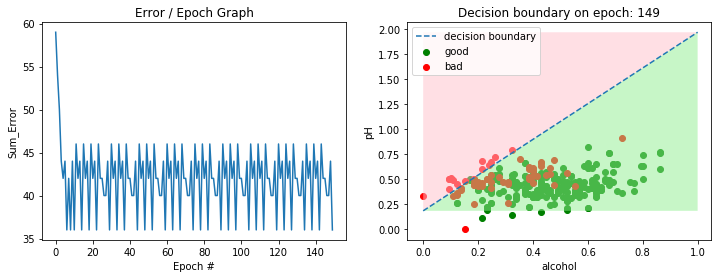

In [28]:
plot_performance(performance, norm_data, good_thresh=7, bad_thresh=4, epoch=-1, save_plot=False)

b) Implement an ADALINE that:

    • Has randomly initialized weights and bias
    • Uses a linear activation function and some kind of quantizer
    • Uses the Widrow-Hoff learning rule

Stochastic Gradient Descent
    
    Gradient Descent is the process of minimizing a function by following the gradients of the cost function.
   
Similarities between perceptron and adaline model:

    * they are both binary classifiers
    * both have a linear decision boundary
    * both can learn iteratively, sample by sample
    * both use a threshold function
    
Difference between perceptron and adaline model
    
    * both are class
    * activation functions returns continuous values or floats between 0 and 1 that are more like probablities
    * These continuous values can be used to learn how close or far this prediction was to the correct value
    

 I WANT TO ACTIVATION TO BE AS CLOSE TO output 1 or 0 and correct itself based off weights
 
 In order to output continuous outputs I need to change prediction function
 

In [458]:
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        #iterate through inputs and multiply them to corresponding weights
        activation += weights[i + 1] * row[i]
    return activation, 1.0 if activation >= 0.0 else -1.0

In [474]:
# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch, batch=1):
    performance = []
    batch_counter = 0
    error = 0.0
    #random weights
    random.seed(1)
    weights = [random.uniform(0, 1) for i in range(len(train[0]))]
    previous_error = 99999
    sum_error = 0
    
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            batch_counter += 1
            probability, prediction = predict(row, weights)
            error += row[-1] - probability
            sum_error += abs(row[-1] - prediction)
#             print(row[-1], prediction, sum_error)
            if (batch_counter == batch):
                batch_counter = 0
                weights[0] = weights[0] + l_rate * error
                for i in range(len(row) - 1):
                    weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
                error = 0
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
        performance.append((epoch, sum_error, weights[1:], weights[0]))
    if n_epoch <= 0:
        epoch = 0
        while (previous_error >= sum_error):
            if (epoch != 0):
                previous_error = sum_error
            sum_error = 0.0
            for row in train:
                batch_counter += 1
                probability, prediction = predict(row, weights)
                error += row[-1] - probability
                sum_error += abs(row[-1] - prediction)
                if (batch_counter == batch):
                    batch_counter = 0
                    weights[0] = weights[0] + l_rate * error
                    for i in range(len(row) - 1):
                        weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
                error = 0
            print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))            
            performance.append((epoch, sum_error, weights[1:], weights[0]))
            epoch += 1
            
    print(weights)
    return performance

In [475]:
def dataframe_to_list(data, good_threshold, bad_threshold, columns):
    new_data = data.copy()

    #Covert all labels to 1 or 0 with threshold of good and bad
    new_data['good_bad'] = [1 if x >= good_threshold else -1 for x in new_data['quality']]

    #Grab all data higher than 8 or lower than 3 in quality.
    new_data = new_data.loc[(data['quality'] >= good_threshold) | (data['quality'] <= bad_threshold)]

    #Grab only the 3 columns
    test_train = new_data.loc[:, columns]
    test_train = test_train.values.tolist()
    return (test_train)


In [476]:
norm_train = dataframe_to_list(norm_data, good_threshold=7, bad_threshold=4, columns=['pH', 'alcohol', 'good_bad'])
norm_train

[[0.5118110236220473, 0.2461538461538461, 1.0],
 [0.48818897637795267, 0.16923076923076918, 1.0],
 [0.4409448818897636, 0.32307692307692304, 1.0],
 [0.5039370078740156, 0.09230769230769226, -1.0],
 [0.38582677165354323, 0.19999999999999984, 1.0],
 [0.5984251968503937, 0.21538461538461545, -1.0],
 [0.4094488188976376, 0.13846153846153852, -1.0],
 [0.9133858267716536, 0.723076923076923, -1.0],
 [0.5039370078740156, 0.16923076923076918, 1.0],
 [0.4488188976377953, 0.12307692307692292, -1.0],
 [0.3307086614173229, 0.10769230769230759, -1.0],
 [0.7952755905511812, 0.32307692307692304, -1.0],
 [0.5354330708661417, 0.32307692307692304, 1.0],
 [0.0, 0.15384615384615385, -1.0],
 [0.33858267716535423, 0.12307692307692292, -1.0],
 [0.4960629921259843, 0.09230769230769226, -1.0],
 [0.48818897637795267, 0.10769230769230759, -1.0],
 [0.6535433070866141, 0.7076923076923076, 1.0],
 [0.6062992125984251, 0.46153846153846156, -1.0],
 [0.3779527559055119, 0.2923076923076924, 1.0],
 [0.3622047244094489, 0.

In [481]:
performance = train_weights(norm_train, l_rate=.00212, n_epoch=1000, batch=15)

>epoch=0, lrate=0.002, error=126.000
>epoch=1, lrate=0.002, error=126.000
>epoch=2, lrate=0.002, error=126.000
>epoch=3, lrate=0.002, error=126.000
>epoch=4, lrate=0.002, error=126.000
>epoch=5, lrate=0.002, error=126.000
>epoch=6, lrate=0.002, error=126.000
>epoch=7, lrate=0.002, error=126.000
>epoch=8, lrate=0.002, error=126.000
>epoch=9, lrate=0.002, error=126.000
>epoch=10, lrate=0.002, error=126.000
>epoch=11, lrate=0.002, error=126.000
>epoch=12, lrate=0.002, error=126.000
>epoch=13, lrate=0.002, error=126.000
>epoch=14, lrate=0.002, error=126.000
>epoch=15, lrate=0.002, error=126.000
>epoch=16, lrate=0.002, error=126.000
>epoch=17, lrate=0.002, error=126.000
>epoch=18, lrate=0.002, error=126.000
>epoch=19, lrate=0.002, error=126.000
>epoch=20, lrate=0.002, error=126.000
>epoch=21, lrate=0.002, error=126.000
>epoch=22, lrate=0.002, error=126.000
>epoch=23, lrate=0.002, error=126.000
>epoch=24, lrate=0.002, error=126.000
>epoch=25, lrate=0.002, error=126.000
>epoch=26, lrate=0.002

>epoch=344, lrate=0.002, error=78.000
>epoch=345, lrate=0.002, error=76.000
>epoch=346, lrate=0.002, error=76.000
>epoch=347, lrate=0.002, error=78.000
>epoch=348, lrate=0.002, error=78.000
>epoch=349, lrate=0.002, error=76.000
>epoch=350, lrate=0.002, error=78.000
>epoch=351, lrate=0.002, error=78.000
>epoch=352, lrate=0.002, error=78.000
>epoch=353, lrate=0.002, error=78.000
>epoch=354, lrate=0.002, error=78.000
>epoch=355, lrate=0.002, error=76.000
>epoch=356, lrate=0.002, error=78.000
>epoch=357, lrate=0.002, error=78.000
>epoch=358, lrate=0.002, error=76.000
>epoch=359, lrate=0.002, error=80.000
>epoch=360, lrate=0.002, error=78.000
>epoch=361, lrate=0.002, error=76.000
>epoch=362, lrate=0.002, error=80.000
>epoch=363, lrate=0.002, error=78.000
>epoch=364, lrate=0.002, error=78.000
>epoch=365, lrate=0.002, error=80.000
>epoch=366, lrate=0.002, error=78.000
>epoch=367, lrate=0.002, error=78.000
>epoch=368, lrate=0.002, error=80.000
>epoch=369, lrate=0.002, error=78.000
>epoch=370, 

>epoch=599, lrate=0.002, error=80.000
>epoch=600, lrate=0.002, error=78.000
>epoch=601, lrate=0.002, error=80.000
>epoch=602, lrate=0.002, error=80.000
>epoch=603, lrate=0.002, error=78.000
>epoch=604, lrate=0.002, error=80.000
>epoch=605, lrate=0.002, error=80.000
>epoch=606, lrate=0.002, error=78.000
>epoch=607, lrate=0.002, error=80.000
>epoch=608, lrate=0.002, error=80.000
>epoch=609, lrate=0.002, error=78.000
>epoch=610, lrate=0.002, error=80.000
>epoch=611, lrate=0.002, error=80.000
>epoch=612, lrate=0.002, error=78.000
>epoch=613, lrate=0.002, error=80.000
>epoch=614, lrate=0.002, error=80.000
>epoch=615, lrate=0.002, error=78.000
>epoch=616, lrate=0.002, error=80.000
>epoch=617, lrate=0.002, error=80.000
>epoch=618, lrate=0.002, error=78.000
>epoch=619, lrate=0.002, error=80.000
>epoch=620, lrate=0.002, error=80.000
>epoch=621, lrate=0.002, error=78.000
>epoch=622, lrate=0.002, error=80.000
>epoch=623, lrate=0.002, error=80.000
>epoch=624, lrate=0.002, error=78.000
>epoch=625, 

>epoch=974, lrate=0.002, error=70.000
>epoch=975, lrate=0.002, error=70.000
>epoch=976, lrate=0.002, error=70.000
>epoch=977, lrate=0.002, error=70.000
>epoch=978, lrate=0.002, error=70.000
>epoch=979, lrate=0.002, error=70.000
>epoch=980, lrate=0.002, error=70.000
>epoch=981, lrate=0.002, error=70.000
>epoch=982, lrate=0.002, error=72.000
>epoch=983, lrate=0.002, error=70.000
>epoch=984, lrate=0.002, error=70.000
>epoch=985, lrate=0.002, error=72.000
>epoch=986, lrate=0.002, error=70.000
>epoch=987, lrate=0.002, error=70.000
>epoch=988, lrate=0.002, error=72.000
>epoch=989, lrate=0.002, error=70.000
>epoch=990, lrate=0.002, error=70.000
>epoch=991, lrate=0.002, error=72.000
>epoch=992, lrate=0.002, error=70.000
>epoch=993, lrate=0.002, error=70.000
>epoch=994, lrate=0.002, error=72.000
>epoch=995, lrate=0.002, error=70.000
>epoch=996, lrate=0.002, error=70.000
>epoch=997, lrate=0.002, error=72.000
>epoch=998, lrate=0.002, error=70.000
>epoch=999, lrate=0.002, error=70.000
[0.844716940

In [482]:
#if epoch is equal to -1 then it shows the line for last epoch
#please put a valid epoch under the number of epoch's attempted

def plot_performance(performance, wine_data, good_thresh, bad_thresh, epoch, save_plot=False):
    #Separate Data to good and bad wine depending on threshold
    good_data = wine_data.loc[data['quality'] >= good_thresh]
    bad_data = wine_data.loc[data['quality'] <= bad_thresh]
   
    listofepochs = [x[0] for x in performance]
    error = [x[1] for x in performance]
    
    #find length of epoch's so I can use last one if -1
    if (epoch >= len(listofepochs)):
        print("Please Put Valid Epoch. If you wish for last epoch put -1")
        return
    
    if (epoch < 0):
        epoch = len(listofepochs) - 1
        
    fig, (ax1, ax2) = plt.subplots(figsize=(12, 4), ncols=2)
    ax1.plot(listofepochs, error)
    ax1.set_title('Error / Epoch Graph')
    ax1.set_ylabel('Sum_Error')
    ax1.set_xlabel('Epoch #')

    ax2.scatter(good_data.alcohol.tolist(), good_data.pH.tolist(), color = 'green', label='good')
    ax2.scatter(bad_data.alcohol.tolist(), bad_data.pH.tolist(), color = 'red', label='bad')
    formula = '({}*x + {})/-{}'.format(performance[epoch][2][1], performance[epoch][3], performance[epoch][2][0])

    graph(formula, wine_data, ax2)
    ax2.set_title('Decision boundary on epoch: {}'.format(epoch))
    ax2.set_ylabel('pH')
    ax2.set_xlabel('alcohol')
    ax2.legend()
    if (save_plot == True):
        plt.savefig('batchsize_15_graph.png')

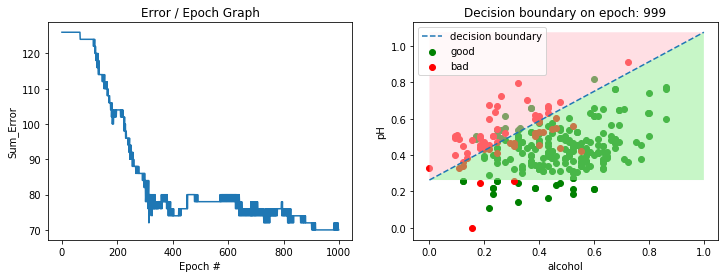

In [483]:
plot_performance(performance, norm_data, good_thresh=7, bad_thresh=4, epoch=-1, save_plot=True)

In [337]:
bias = performance[-1][3]
weights = list(performance[-1][2])
print(bias, weights)

weights.insert(0, bias)
print(weights)

for row in norm_train:
    probability, prediction = predict(row, weights)
    print("Expected=%d, Predicted=%d" % (row[-1], prediction))

0.43966875125435195 [-1.8062744625296578, 2.495445753342667]
[0.43966875125435195, -1.8062744625296578, 2.495445753342667]
Expected=1, Predicted=1
Expected=1, Predicted=-1
Expected=1, Predicted=1
Expected=-1, Predicted=-1
Expected=1, Predicted=1
Expected=-1, Predicted=-1
Expected=-1, Predicted=1
Expected=-1, Predicted=1
Expected=1, Predicted=-1
Expected=-1, Predicted=-1
Expected=-1, Predicted=1
Expected=-1, Predicted=-1
Expected=1, Predicted=1
Expected=-1, Predicted=1
Expected=-1, Predicted=1
Expected=-1, Predicted=-1
Expected=-1, Predicted=-1
Expected=1, Predicted=1
Expected=-1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=-1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=-1, Predicted=-1
Expected=1, Predicted=1
Expected=-1, Predicted=-1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, 

d)
    I found that with a batch size of 15 learning rate of .00212 had a sum error of 70 which was the lowest i had see